In [43]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
img = cv2.imread("C:/Users/shahb/Image Classifier/test_images/ronaldo1.jpg")
img.shape

(1839, 2758, 3)

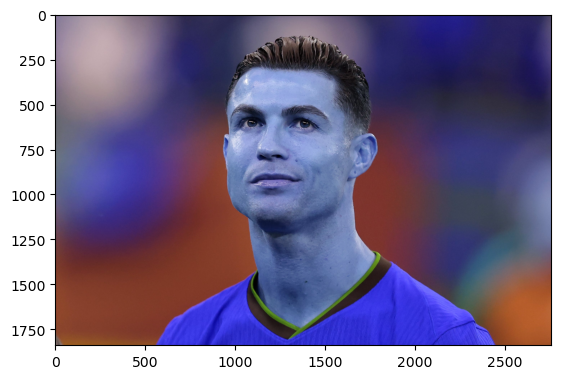

In [47]:
plt.imshow(img)

In [49]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1839, 2758)

In [51]:
gray

array([[131, 131, 131, ...,  77,  77,  77],
       [132, 132, 132, ...,  78,  78,  79],
       [132, 132, 132, ...,  78,  80,  81],
       ...,
       [105, 107, 107, ...,  79,  80,  81],
       [104, 106, 107, ...,  79,  80,  80],
       [102, 106, 108, ...,  79,  79,  79]], dtype=uint8)

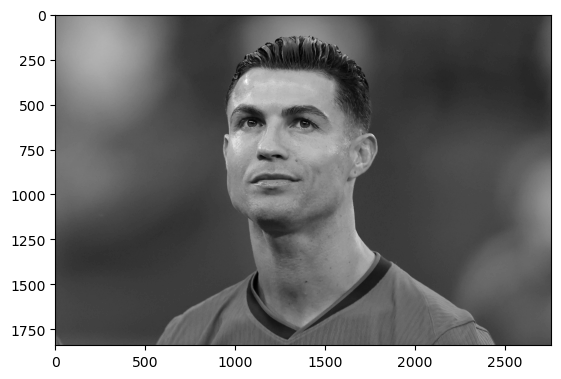

In [53]:
plt.imshow(gray, cmap='gray')

In [55]:
face_cascade = cv2.CascadeClassifier("C:/Users/shahb/Image Classifier/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/Users/shahb/Image Classifier/opencv/haarcascades/haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[803, 270, 851, 851]])

In [56]:
x,y,w,h = faces[0]
x,y,w,h

(803, 270, 851, 851)

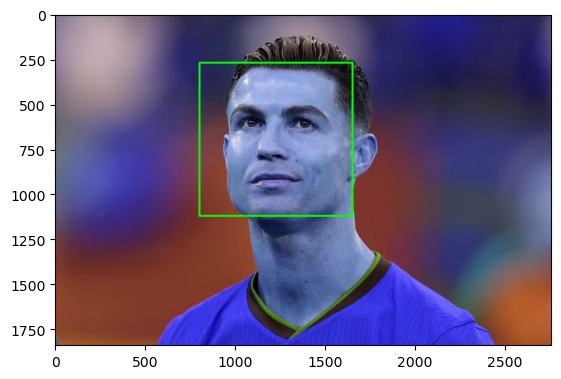

In [59]:
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0),10)
plt.imshow(face_img)

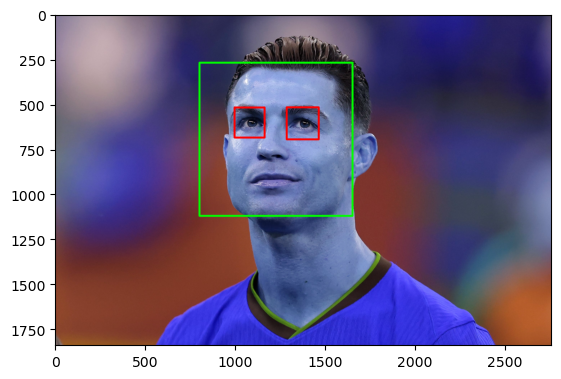

In [61]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),10)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),10)
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

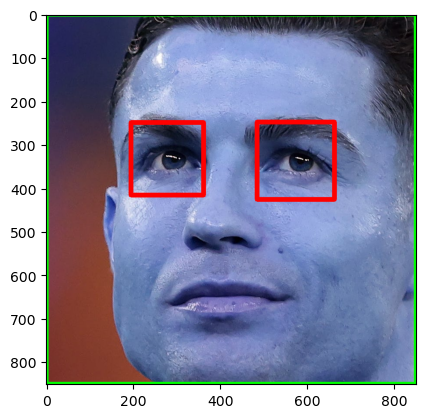

In [63]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [65]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

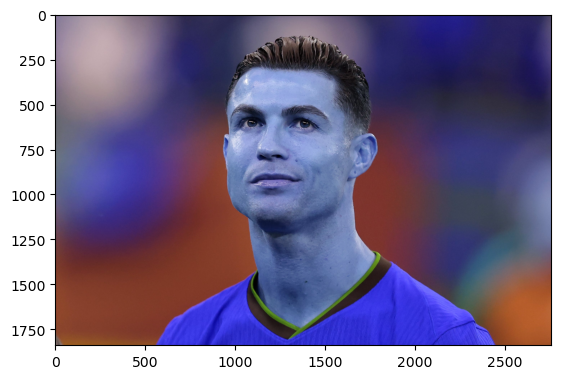

In [67]:
original_image = cv2.imread("C:/Users/shahb/Image Classifier/test_images/ronaldo1.jpg")
plt.imshow(original_image)

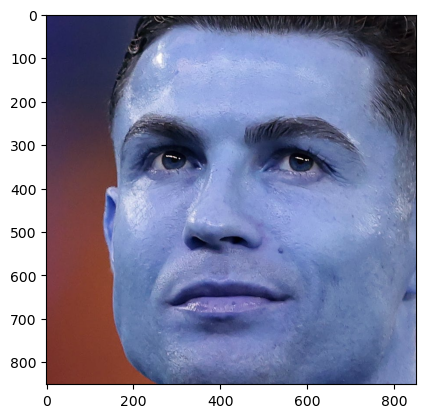

In [69]:
cropped_image = get_cropped_image_if_2_eyes("C:/Users/shahb/Image Classifier/test_images/ronaldo1.jpg")
plt.imshow(cropped_image)

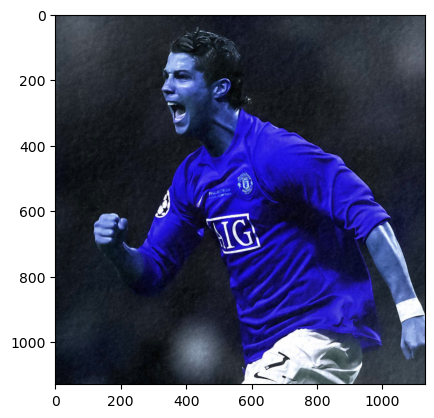

In [71]:
org_img_obstructed = cv2.imread("C:/Users/shahb/Image Classifier/test_images/ronaldo2.jpg")
plt.imshow(org_img_obstructed)

In [168]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [170]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [172]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/ronaldo',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [174]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [176]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
ronaldo
Generating cropped images in folder:  ./dataset/cropped/ronaldo
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [178]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    #procces coefficient
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

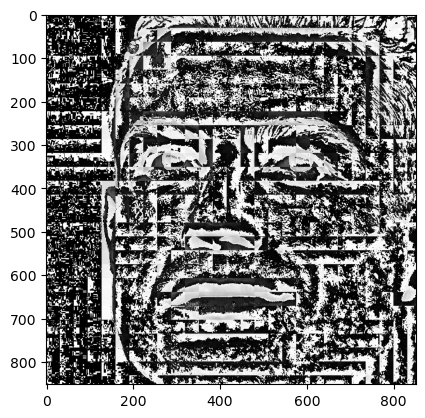

In [180]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [182]:
celebrity_file_names_dict

{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './dataset/cropped/maria_sharapova/maria_sharapova7.png',
  './dataset/cropped/maria_sharapova/maria_sharapova8.png',
  './dataset/cropped/maria_sharapova/maria_sharapova9.png',
  './dataset/cropped/maria_sharapova/maria_sharapova10.png',
  './dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './dataset/cropped/maria_sharapova/maria_sharapova12.png',
  './dataset/cropped/maria_sharapova/maria_sharapova13.png',
  './dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './dataset/cropped/maria_sharapova/maria_sharapova15.png',
  './dataset/cropped/maria_sharapova/maria_sharapova16.png',
  './dataset/c

In [184]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'maria_sharapova': 0,
 'roger_federer': 1,
 'ronaldo': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [188]:
X, Y = [],[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])

In [189]:
len(X[0])

4096

In [192]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(161, 4096)

In [194]:
X[0]

array([ 62., 110., 122., ...,  33.,  19., 251.])

In [196]:
Y[0]

0

Data cleaning procces is done now we will train our model
 we will use SVM with rbf kernel tuned with hueristic finetuning

In [198]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('scv', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.8292682926829268

In [202]:
len(X_test)

41

In [214]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.45      0.62        11
           2       0.75      0.86      0.80         7
           3       0.67      1.00      0.80         6
           4       1.00      1.00      1.00        11

    accuracy                           0.83        41
   macro avg       0.83      0.86      0.82        41
weighted avg       0.87      0.83      0.82        41



Lets use Gridsearch to try out different models with different parameters. goal is to comeup with best model with best fine tuned parameters.

In [216]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [218]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability =True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C':[1,5,10]
        }
    }
}

In [222]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.800000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.708333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.850000,{'logisticregression__C': 1}


In [224]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [226]:
best_estimators['svm'].score(X_test, Y_test)

0.8780487804878049

In [228]:
best_estimators['random_forest'].score(X_test, Y_test)

0.7317073170731707

In [230]:
best_estimators['logistic_regression'].score(X_test, Y_test)

0.8292682926829268

In [232]:
best_clf = best_estimators['svm']

In [234]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  0,  0],
       [ 2,  8,  0,  1,  0],
       [ 0,  0,  6,  1,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  1,  0,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'True')

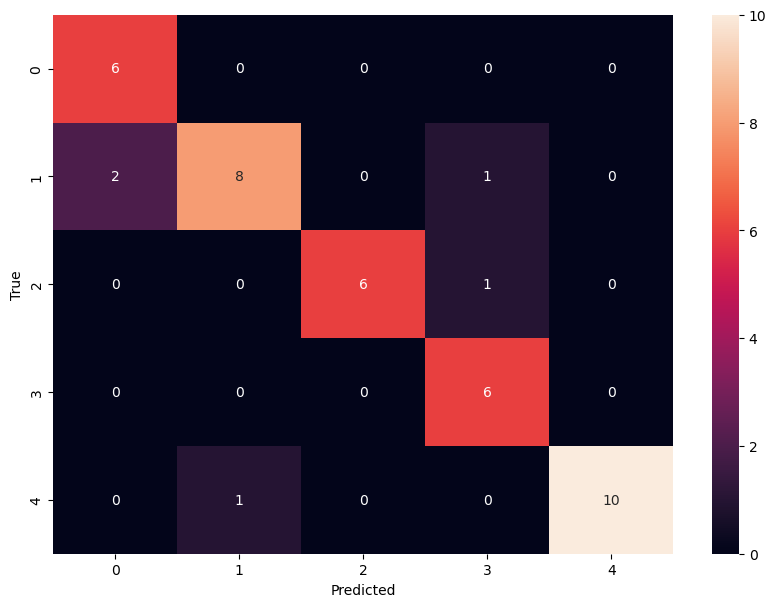

In [236]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [238]:
class_dict

{'maria_sharapova': 0,
 'roger_federer': 1,
 'ronaldo': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

Save the trained model

In [243]:
import joblib
#save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

Save class dictionary

In [245]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))